In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
Create a Series by passing list of values with default integer

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Create a DataFrame by passing NumPy array, with a datetime index and labeled columns

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070
2013-01-04,1.530548,0.396588,1.527403,1.026733
2013-01-05,-0.781333,1.560377,1.247647,0.691740
2013-01-06,-0.421930,0.961573,0.837522,1.036750


In [5]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index= list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data
Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070
2013-01-04,1.530548,0.396588,1.527403,1.026733
2013-01-05,-0.781333,1.560377,1.247647,0.691740


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,1.530548,0.396588,1.527403,1.026733
2013-01-05,-0.781333,1.560377,1.247647,0.691740
2013-01-06,-0.421930,0.961573,0.837522,1.036750


Display the index, columns and underlying NumPy data.

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.01485071, -0.05349773, -1.15727466, -0.08554696],
       [-0.79246084,  1.3151516 ,  1.02639755, -0.04539199],
       [-0.53174699,  0.5843897 , -0.89960087, -1.03206976],
       [ 1.53054817,  0.39658773,  1.52740295,  1.02673336],
       [-0.78133322,  1.56037667,  1.24764688,  0.69173971],
       [-0.42192984,  0.96157256,  0.83752216,  1.03674973]])

describe() shows a quick statistical summary of the data.

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.168629,0.794097,0.430349,0.265369
std,0.879936,0.601189,1.156018,0.807410
min,-0.792461,-0.053498,-1.157275,-1.032070
25%,-0.718937,0.443538,-0.465320,-0.075508
50%,-0.476838,0.772981,0.931960,0.323174
75%,-0.116620,1.226757,1.192335,0.942985
max,1.530548,1.560377,1.527403,1.036750


Transposing your data:

In [13]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.014851,-0.792461,-0.531747,1.530548,-0.781333,-0.421930
B,-0.053498,1.315152,0.584390,0.396588,1.560377,0.961573
C,-1.157275,1.026398,-0.899601,1.527403,1.247647,0.837522
D,-0.085547,-0.045392,-1.032070,1.026733,0.691740,1.036750


Sorting by an axis:

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.085547,-1.157275,-0.053498,-0.014851
2013-01-02,-0.045392,1.026398,1.315152,-0.792461
2013-01-03,-1.032070,-0.899601,0.584390,-0.531747
2013-01-04,1.026733,1.527403,0.396588,1.530548
2013-01-05,0.691740,1.247647,1.560377,-0.781333
2013-01-06,1.036750,0.837522,0.961573,-0.421930


Sorting by values:

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547
2013-01-04,1.530548,0.396588,1.527403,1.026733
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070
2013-01-06,-0.421930,0.961573,0.837522,1.036750
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-05,-0.781333,1.560377,1.247647,0.691740


# Selection

Use optimized pandas data access methods: .at, .iat, .loc and .iloc
## Getting

Selecting a single column, yeilding a Series equivalent of df.A

In [16]:
df['A']

2013-01-01   -0.014851
2013-01-02   -0.792461
2013-01-03   -0.531747
2013-01-04    1.530548
2013-01-05   -0.781333
2013-01-06   -0.421930
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070
2013-01-04,1.530548,0.396588,1.527403,1.026733


Selection by Label
For getting a cross section using a label

In [19]:
df.loc[dates[0]]

A   -0.014851
B   -0.053498
C   -1.157275
D   -0.085547
Name: 2013-01-01 00:00:00, dtype: float64

Selecing on a multi-axis by label:

In [20]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.014851,-0.053498
2013-01-02,-0.792461,1.315152
2013-01-03,-0.531747,0.584390
2013-01-04,1.530548,0.396588
2013-01-05,-0.781333,1.560377
2013-01-06,-0.421930,0.961573


Showing label slicing, both endpoints are _included_

In [21]:
df.loc['20130102': '20130105', ['A', 'B']]

,A,B
2013-01-02,-0.792461,1.315152
2013-01-03,-0.531747,0.584390
2013-01-04,1.530548,0.396588
2013-01-05,-0.781333,1.560377


Reduction in the dimensions of the returned object:

In [22]:
df.loc['20130102', ['A', 'B']]

A   -0.792461
B    1.315152
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [23]:
df.loc[dates[0], 'A']

-0.01485071470784195

For getting fast access to a scalar (eqauivalent to prior method):

In [24]:
df.at[dates[0], 'A']

-0.01485071470784195

Selection by Position

Select via the position of the passed integers:

In [25]:
df.iloc[3]

A    1.530548
B    0.396588
C    1.527403
D    1.026733
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [26]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.530548,0.396588
2013-01-05,-0.781333,1.560377


By lists of integer position locations, similar to numpy/python style:

In [27]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,-0.792461,1.026398
2013-01-03,-0.531747,-0.899601
2013-01-05,-0.781333,1.247647


For slicing rows explicitly:

In [28]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.792461,1.315152,1.026398,-0.045392
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070


For slicing columns explicitly:

In [29]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.053498,-1.157275
2013-01-02,1.315152,1.026398
2013-01-03,0.584390,-0.899601
2013-01-04,0.396588,1.527403
2013-01-05,1.560377,1.247647
2013-01-06,0.961573,0.837522


For getting a value explicitly:

In [30]:
df.iloc[1,1]

1.3151515958720184

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.iat[1,1]

1.3151515958720184

# Boolean Indexing

Using a single column's values to select data

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-04,1.530548,0.396588,1.527403,1.026733


Selecting values from a DataFrame where a boolean condition is met

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,1.315152,1.026398,NaN
2013-01-03,NaN,0.584390,NaN,NaN
2013-01-04,1.530548,0.396588,1.527403,1.026733
2013-01-05,NaN,1.560377,1.247647,0.691740
2013-01-06,NaN,0.961573,0.837522,1.036750


Using the isin() method for flitering

In [34]:
df2 = df.copy()

df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547,one
2013-01-02,-0.792461,1.315152,1.026398,-0.045392,one
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070,two
2013-01-04,1.530548,0.396588,1.527403,1.026733,three
2013-01-05,-0.781333,1.560377,1.247647,0.691740,four
2013-01-06,-0.421930,0.961573,0.837522,1.036750,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.531747,0.584390,-0.899601,-1.03207,two
2013-01-05,-0.781333,1.560377,1.247647,0.69174,four


# Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.014851,-0.053498,-1.157275,-0.085547,NaN
2013-01-02,-0.792461,1.315152,1.026398,-0.045392,1.0
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070,2.0
2013-01-04,1.530548,0.396588,1.527403,1.026733,3.0
2013-01-05,-0.781333,1.560377,1.247647,0.691740,4.0
2013-01-06,-0.421930,0.961573,0.837522,1.036750,5.0


Setting values by label:

In [38]:
df.at[dates[0], 'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,-0.053498,-1.157275,-0.085547,NaN
2013-01-02,-0.792461,1.315152,1.026398,-0.045392,1.0
2013-01-03,-0.531747,0.584390,-0.899601,-1.032070,2.0
2013-01-04,1.530548,0.396588,1.527403,1.026733,3.0
2013-01-05,-0.781333,1.560377,1.247647,0.691740,4.0
2013-01-06,-0.421930,0.961573,0.837522,1.036750,5.0


Setting values by position:

In [39]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:,'D'] = np.array(([5]) * len(df))

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.157275,5,NaN
2013-01-02,-0.792461,1.315152,1.026398,5,1.0
2013-01-03,-0.531747,0.584390,-0.899601,5,2.0
2013-01-04,1.530548,0.396588,1.527403,5,3.0
2013-01-05,-0.781333,1.560377,1.247647,5,4.0
2013-01-06,-0.421930,0.961573,0.837522,5,5.0


A _where_ operation with setting:

In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.157275,-5,NaN
2013-01-02,-0.792461,-1.315152,-1.026398,-5,-1.0
2013-01-03,-0.531747,-0.584390,-0.899601,-5,-2.0
2013-01-04,-1.530548,-0.396588,-1.527403,-5,-3.0
2013-01-05,-0.781333,-1.560377,-1.247647,-5,-4.0
2013-01-06,-0.421930,-0.961573,-0.837522,-5,-5.0


# Missing Data

Re-indexing allows you to change/add/elete the index on a specified axis. This returns a copy of the data

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.157275,5,NaN,NaN
2013-01-02,-0.792461,1.315152,1.026398,5,1.0,NaN
2013-01-03,-0.531747,0.584390,-0.899601,5,2.0,NaN
2013-01-04,1.530548,0.396588,1.527403,5,3.0,NaN


In [44]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.157275,5,NaN,1.0
2013-01-02,-0.792461,1.315152,1.026398,5,1.0,1.0
2013-01-03,-0.531747,0.584390,-0.899601,5,2.0,NaN
2013-01-04,1.530548,0.396588,1.527403,5,3.0,NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.792461,1.315152,1.026398,5,1.0,1.0


Fill missing data:

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.157275,5,5.0,1.0
2013-01-02,-0.792461,1.315152,1.026398,5,1.0,1.0
2013-01-03,-0.531747,0.584390,-0.899601,5,2.0,5.0
2013-01-04,1.530548,0.396588,1.527403,5,3.0,5.0


To get the boolean mask where values are _nan_

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
## Stats
Operations in general _exclude_ missing data.  
  
Performing a descriptive statistic.

In [48]:
df.mean()

A   -0.166154
B    0.803013
C    0.430349
D    5.000000
F    3.000000
dtype: float64

Same operation on another axis

In [49]:
df.mean(1)

2013-01-01    0.960681
2013-01-02    1.509818
2013-01-03    1.230608
2013-01-04    2.290908
2013-01-05    2.205338
2013-01-06    2.275433
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically boradcasts along the specified dimension.

In [50]:
s = pd.Series([1,3,5,np.nan, 6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.531747,-0.415610,-1.899601,4.0,1.0
2013-01-04,-1.469452,-2.603412,-1.472597,2.0,0.0
2013-01-05,-5.781333,-3.439623,-3.752353,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply
Applying functions to the data

In [52]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.157275,5,NaN
2013-01-02,-0.792461,1.315152,1.026398,5,1.0
2013-01-03,-0.531747,0.584390,-0.899601,5,2.0
2013-01-04,1.530548,0.396588,1.527403,5,3.0
2013-01-05,-0.781333,1.560377,1.247647,5,4.0
2013-01-06,-0.421930,0.961573,0.837522,5,5.0


In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.157275,5,NaN
2013-01-02,-0.792461,1.315152,-0.130877,10,1.0
2013-01-03,-1.324208,1.899541,-1.030478,15,3.0
2013-01-04,0.206340,2.296129,0.496925,20,6.0
2013-01-05,-0.574993,3.856506,1.744572,25,10.0
2013-01-06,-0.996923,4.818078,2.582094,30,15.0


In [54]:
df.apply(lambda x: x.max() - x.min())

A    2.323009
B    1.560377
C    2.684678
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    2
2    0
3    4
4    6
5    1
6    3
7    1
8    1
9    1
dtype: int32

In [56]:
s.value_counts()

1    4
6    1
5    1
4    1
3    1
2    1
0    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operae on each element of the array, as in the code snippet below. Not that the pattern-matching in str generally uses regular expressions by default.

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat
pandas provides various facilities for easily combining together Series, DataFrame and Panel objects with various set logic for the indexes and relational algebra functionality in the case of join / merge-type operations

Concatenating pandas objects together with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10,4))

df

,0,1,2,3
0,-0.385765,0.686069,-0.490002,0.786836
1,0.502204,-1.312072,0.453759,-0.529095
2,-0.044698,-1.937813,0.714355,-1.001472
3,-0.519960,0.436745,-0.622475,1.901560
4,0.674023,-0.051443,1.408429,-0.239288
5,-0.302703,-0.621486,1.018273,-1.639381
6,-1.229448,0.058325,-0.045924,1.018485
7,1.235376,-1.411384,-0.378817,-0.709752
8,-1.258013,0.176808,-0.711285,-0.046408
9,-1.180450,1.708774,1.363699,0.321739


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.385765  0.686069 -0.490002  0.786836
 1  0.502204 -1.312072  0.453759 -0.529095
 2 -0.044698 -1.937813  0.714355 -1.001472,
           0         1         2         3
 3 -0.519960  0.436745 -0.622475  1.901560
 4  0.674023 -0.051443  1.408429 -0.239288
 5 -0.302703 -0.621486  1.018273 -1.639381
 6 -1.229448  0.058325 -0.045924  1.018485,
           0         1         2         3
 7  1.235376 -1.411384 -0.378817 -0.709752
 8 -1.258013  0.176808 -0.711285 -0.046408
 9 -1.180450  1.708774  1.363699  0.321739]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,-0.385765,0.686069,-0.490002,0.786836
1,0.502204,-1.312072,0.453759,-0.529095
2,-0.044698,-1.937813,0.714355,-1.001472
3,-0.519960,0.436745,-0.622475,1.901560
4,0.674023,-0.051443,1.408429,-0.239288
5,-0.302703,-0.621486,1.018273,-1.639381
6,-1.229448,0.058325,-0.045924,1.018485
7,1.235376,-1.411384,-0.378817,-0.709752
8,-1.258013,0.176808,-0.711285,-0.046408
9,-1.180450,1.708774,1.363699,0.321739


## Join
SQL syle merges

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example can be given as

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append
Appends rows to a dataframe.

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.098401,2.134935,0.641320,-0.566871
1,-0.890821,0.387879,0.682410,-1.671660
2,-0.453748,1.327053,0.207967,-0.939763
3,0.956203,-0.346329,-1.784590,0.344738
4,-0.738325,2.206286,-0.021146,1.434991
5,-0.134440,0.770974,-1.548659,0.869754
6,-0.689969,-0.871215,-0.146525,-0.503227
7,0.420536,0.938634,-1.278615,-0.496345


In [68]:
df

,A,B,C,D
0,-0.098401,2.134935,0.641320,-0.566871
1,-0.890821,0.387879,0.682410,-1.671660
2,-0.453748,1.327053,0.207967,-0.939763
3,0.956203,-0.346329,-1.784590,0.344738
4,-0.738325,2.206286,-0.021146,1.434991
5,-0.134440,0.770974,-1.548659,0.869754
6,-0.689969,-0.871215,-0.146525,-0.503227
7,0.420536,0.938634,-1.278615,-0.496345


In [69]:
s = df.iloc[3]
s

A    0.956203
B   -0.346329
C   -1.784590
D    0.344738
Name: 3, dtype: float64

In [70]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.098401,2.134935,0.641320,-0.566871
1,-0.890821,0.387879,0.682410,-1.671660
2,-0.453748,1.327053,0.207967,-0.939763
3,0.956203,-0.346329,-1.784590,0.344738
4,-0.738325,2.206286,-0.021146,1.434991
5,-0.134440,0.770974,-1.548659,0.869754
6,-0.689969,-0.871215,-0.146525,-0.503227
7,0.420536,0.938634,-1.278615,-0.496345
8,0.956203,-0.346329,-1.784590,0.344738


# Grouping
By "group by" we are refering to a process involving one or more of following steps:
* **Splitting** the data into gropus based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [71]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                    'foo', 'bar', 'foo', 'foo'],
              'B': ['one', 'one', 'two', 'three',
                    'two', 'two', 'one', 'three'],
              'C': np.random.randn(8),
              'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.831723,1.278306
1,bar,one,0.318249,-0.764060
2,foo,two,-0.305893,0.014227
3,bar,three,-0.760913,-0.659531
4,foo,two,0.529261,-0.804227
5,bar,two,-0.228196,-0.572557
6,foo,one,-0.229418,-0.507188
7,foo,three,-1.088049,-0.622027


Grouping and then applying the sum() function to the resulting groups

In [72]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.670860,-1.996148
foo,-2.925822,-0.640909


Grouping by multiple columns forms a heirarchical index, and again we can apply the sum function

In [73]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.318249 -0.764060
    three -0.760913 -0.659531
    two   -0.228196 -0.572557
foo one   -2.061141  0.771117
    three -1.088049 -0.622027
    two    0.223368 -0.790000

Return a copy of DataFrame excluding elements from groups that do not staisfy boolean criteria specified by func

In [74]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
              'B': [1, 2, 3, 4, 5, 6],
              'C': [2.0, 5., 8., 1., 2., 9.]})
df

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [75]:
grouped = df.groupby('A')
grouped.filter(lambda x: x['B'].mean() > 3.)

,A,B,C
1,bar,2,5.0
3,bar,4,1.0
5,bar,6,9.0


# Reshaping
## Stack

In [76]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 
            'foo', 'foo', 'qux', 'qux'],
           ['one','two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [77]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [78]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.982731  1.354786
      two     0.829077  1.104678
baz   one     0.798573 -0.438009
      two     0.580155 -0.651982
foo   one    -0.291609  1.260365
      two     0.321190  0.237062
qux   one    -0.800959  2.332056
      two    -0.426222  1.507530

In [79]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.982731  1.354786
      two     0.829077  1.104678
baz   one     0.798573 -0.438009
      two     0.580155 -0.651982

The stack() method 'compresses' a level in the DataFrames' columns

In [80]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.982731
               B    1.354786
       two     A    0.829077
               B    1.104678
baz    one     A    0.798573
               B   -0.438009
       two     A    0.580155
               B   -0.651982
dtype: float64

With a 'stacked' DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level.

In [81]:
stacked.unstack()

A         B
first second                    
bar   one    -1.982731  1.354786
      two     0.829077  1.104678
baz   one     0.798573 -0.438009
      two     0.580155 -0.651982

In [82]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.982731  0.829077
      B  1.354786  1.104678
baz   A  0.798573  0.580155
      B -0.438009 -0.651982

In [83]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.982731  0.798573
       B  1.354786 -0.438009
two    A  0.829077  0.580155
       B  1.104678 -0.651982

## Pivot Tables

In [84]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
              'B': ['A', 'B', 'C'] * 4,
              'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
              'D': np.random.randn(12),
              'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.825002,0.201481
1,one,B,foo,-0.456725,0.519808
2,two,C,foo,-0.795970,-1.301011
3,three,A,bar,0.412066,0.390441
4,one,B,bar,1.609203,-1.462285
5,one,C,bar,-1.441741,1.249054
6,two,A,foo,-0.387774,-0.888973
7,three,B,foo,-0.373639,-1.400585
8,one,C,foo,0.706127,1.747163
9,one,A,bar,0.933170,-0.916984


We can product pivot tables from this data very easily

In [85]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.933170 -0.825002
      B  1.609203 -0.456725
      C -1.441741  0.706127
three A  0.412066       NaN
      B       NaN -0.373639
      C  0.027224       NaN
two   A       NaN -0.387774
      B -0.036593       NaN
      C       NaN -0.795970

## Time Series
pandas has simple, powerful and efficient functionality for performing resampling operations and during frequency conversion (e.g. converting second data into 5-minute data).

In [86]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [87]:
ts.resample('5Min').sum()

2012-01-01    24996
Freq: 5T, dtype: int32

In [88]:
ts.resample('5min').mean()

2012-01-01    249.96
Freq: 5T, dtype: float64

In [89]:
ts.resample('5min').ohlc()

,open,high,low,close
2012-01-01,323,496,6,243


In [90]:
ts.resample('5min').max()

2012-01-01    496
Freq: 5T, dtype: int32

In [91]:
ts.max()

496

For downsampling _closed_ can be set to 'left' or 'right' to specify which end of the interval is closed

In [92]:
ts.resample('5Min', closed='right').mean()

2011-12-31 23:55:00    323.000000
2012-01-01 00:00:00    249.222222
Freq: 5T, dtype: float64

In [93]:
ts[:59].mean()

247.1864406779661

<b>Note</b> - don't forget to check out https://elitedatascience.com/imbalanced-classes - for use cases of upsampling / downsampling / random forest algo

Time zone representation

In [94]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [95]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.352371
2012-03-07    0.882981
2012-03-08    0.460405
2012-03-09   -0.256362
2012-03-10    0.751600
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.352371
2012-03-07 00:00:00+00:00    0.882981
2012-03-08 00:00:00+00:00    0.460405
2012-03-09 00:00:00+00:00   -0.256362
2012-03-10 00:00:00+00:00    0.751600
Freq: D, dtype: float64

Converting to another timezone

In [97]:
ts_utc.tz_convert('Asia/Calcutta')

2012-03-06 05:30:00+05:30   -0.352371
2012-03-07 05:30:00+05:30    0.882981
2012-03-08 05:30:00+05:30    0.460405
2012-03-09 05:30:00+05:30   -0.256362
2012-03-10 05:30:00+05:30    0.751600
Freq: D, dtype: float64

Converting between timespan representations:

In [98]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [99]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.523927
2012-02-29   -0.148803
2012-03-31    1.482937
2012-04-30    1.338679
2012-05-31    0.413853
Freq: M, dtype: float64

In [100]:
ps = ts.to_period()
ps

2012-01   -1.523927
2012-02   -0.148803
2012-03    1.482937
2012-04    1.338679
2012-05    0.413853
Freq: M, dtype: float64

In [101]:
ps.to_timestamp()

2012-01-01   -1.523927
2012-02-01   -0.148803
2012-03-01    1.482937
2012-04-01    1.338679
2012-05-01    0.413853
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [102]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [103]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts[:5]

1990Q1    0.657697
1990Q2    0.620540
1990Q3   -2.670901
1990Q4   -0.603482
1991Q1    0.120840
Freq: Q-NOV, dtype: float64

In [104]:
ts.index = (prng.asfreq('M', 'e')+1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.657697
1990-06-01 09:00    0.620540
1990-09-01 09:00   -2.670901
1990-12-01 09:00   -0.603482
1991-03-01 09:00    0.120840
Freq: H, dtype: float64

## Categoricals
pandas can include categorical data in a DataFrame

In [105]:
df = pd.DataFrame({'id': [1,2,3,4,5,6], 'raw_grade' : list('abbaae')})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type

In [106]:
df['grade'] = df.raw_grade.astype('category')
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to meaningful names (assigning to Series.cat.categories is inplace!)

In [107]:
df.grade.cat.categories = ['Very Good', 'Good', 'Very Bad']
df.grade

0    Very Good
1         Good
2         Good
3    Very Good
4    Very Good
5     Very Bad
Name: grade, dtype: category
Categories (3, object): [Very Good, Good, Very Bad]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series by default)

In [108]:
df.grade = df.grade.cat.set_categories(['Very Bad', 'Bad', 'Medium', 'Good', 'Very Good' ])
df.grade

0    Very Good
1         Good
2         Good
3    Very Good
4    Very Good
5     Very Bad
Name: grade, dtype: category
Categories (5, object): [Very Bad, Bad, Medium, Good, Very Good]

Sorting is per order in the categories, not lexical order

In [109]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,Very Bad
1,2,b,Good
2,3,b,Good
0,1,a,Very Good
3,4,a,Very Good
4,5,a,Very Good


Grouping by categorical column also shows empty categories

In [110]:
df.groupby('grade').size()

grade
Very Bad     1
Bad          0
Medium       0
Good         2
Very Good    3
dtype: int64

# Plotting

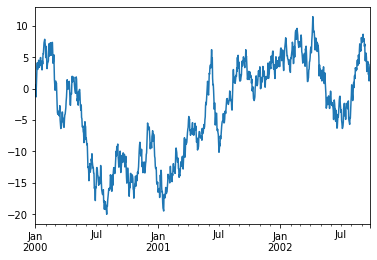

In [111]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()  # Generates random plot!!

ts.plot()

On a DataFrame, the plot() method is a convenience to plot all the column with labels

<Figure size 432x288 with 0 Axes>

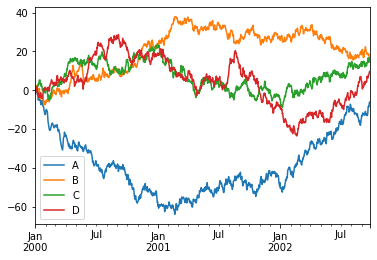

In [112]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
             columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')